In [9]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random

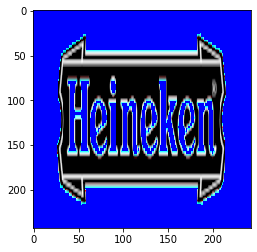

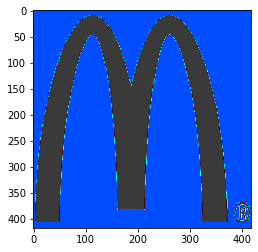

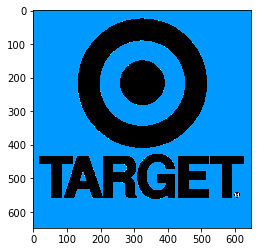

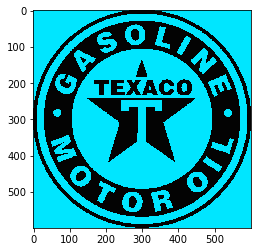

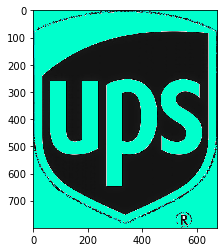

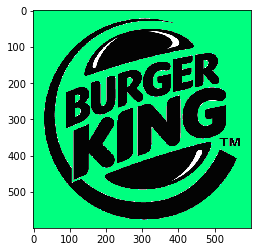

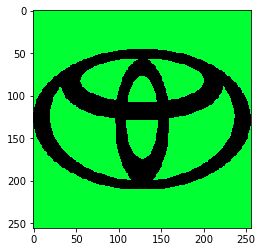

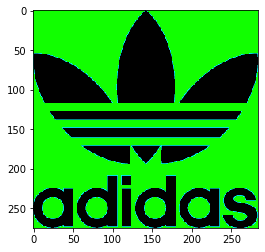

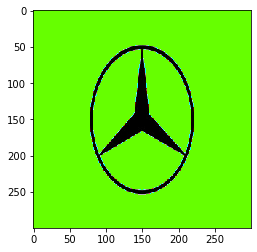

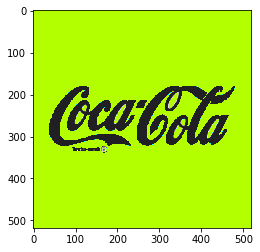

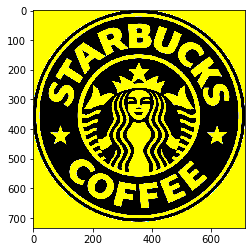

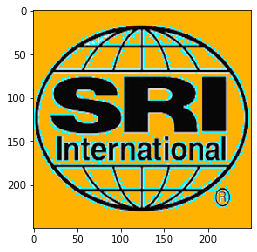

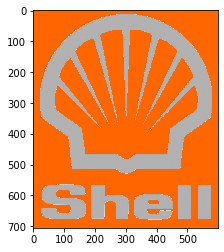

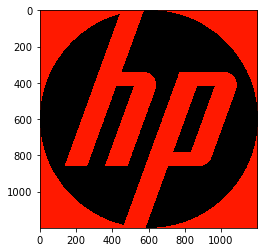

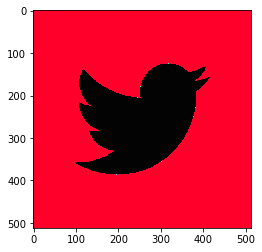

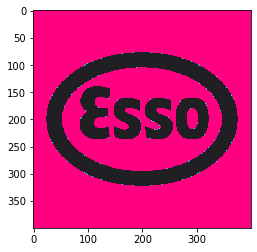

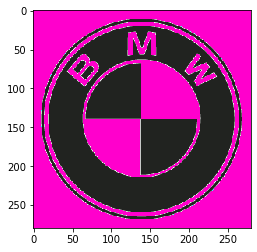

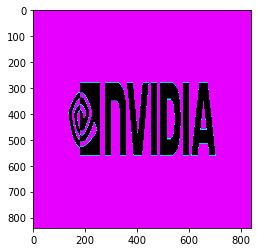

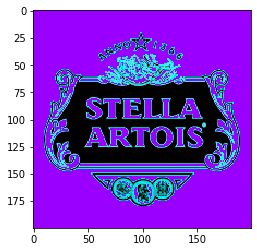

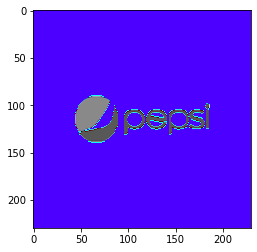

In [13]:
fileList = os.listdir('bisk_blocks')

# Create this new list using list comprehension
imgFiles = [f for f in fileList if f.endswith('.png')]
random.shuffle(imgFiles)
numImgs = len(imgFiles)

outputList = []

for i, file in enumerate(imgFiles):
    img = cv2.imread(os.path.join('bisk_blocks', file))
    hue = int((i/numImgs)*180)
    hsvColor = np.uint8([[[hue, 255, 255]]])
    bgrColor = cv2.cvtColor(hsvColor, cv2.COLOR_HSV2BGR)
    bkgndColor = img[0,0].copy()
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if (img[y,x]==bkgndColor).all():
                img[y,x] = bgrColor[0,0]
    outputList.append((file, img))
    plt.imshow(img)
    plt.show()

In [15]:
outFolder = 'newbisklabels'

if not outFolder in os.listdir():
    os.mkdir(outFolder)
    
for outFile, outImg in outputList:
    cv2.imwrite(os.path.join(outFolder, outFile), outImg)